## Plotting and manipulating images 

## Matplotlib

Some of the content in this notebook is taken from the tutorial adapted by Kevin Zakka for the Spring 2020 edition of [cs231n](http://cs231n.stanford.edu/) and some from the image processing course by [Guillaume Witz](https://github.com/guiwitz).

In this lab, we will cover:
* Matplotlib: Plotting, Subplots, Images
* Image manipulation: Modify images (that are simply numpy arrays)

### What is Matplotlib?

Matplotlib is a plotting library. In this section give a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib as matplt
matplt.__version__

'3.5.1'

By running this special iPython command, we will be displaying plots inline:

In [3]:
%matplotlib inline

### Plotting

The most important function in `matplotlib` is plot, which allows you to plot 2D data. Here is a simple example:

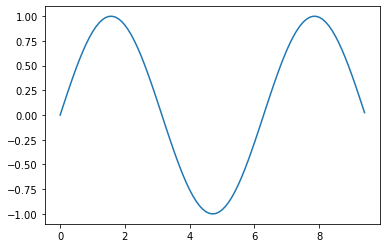

In [4]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

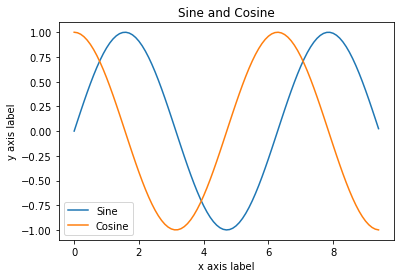

In [5]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

### Subplots 

You can plot different things in the same figure using the subplot function. Here is an example:

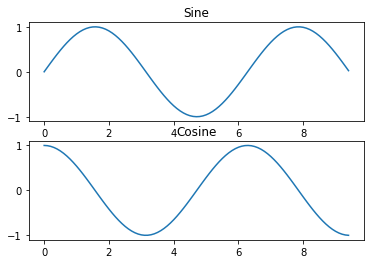

In [6]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

You can read much more about the `subplot` function in the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html?highlight=subplot#matplotlib.pyplot.subplot) and further [examples](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html).

A comprehensive tutorial on using Matplotlib is also available [here](https://github.com/rougier/matplotlib-tutorial)

## Plotting images with Matplotlib

This tutorial was originally written by [Justin Johnson](https://web.eecs.umich.edu/~justincj/) for Stanford's [cs231n](http://cs231n.stanford.edu/) and adapted as a Jupyter notebook for cs228 by [Volodymyr Kuleshov](http://web.stanford.edu/~kuleshov/) and [Isaac Caswell](https://symsys.stanford.edu/viewing/symsysaffiliate/21335), and later by Kevin Zakka for the Spring 2020 edition of [cs231n](http://cs231n.stanford.edu/).


Recall, ```list``` in Python is one of the **structures** to store sequence of numbers. If we think of an image that has multiple lines and columns of pixels, we could now imagine that we can represent it as a list of lists, each single list being e.g. one row of pixels. For example a 3 x 3 image could be:

In [7]:
my_image = [[4,8,7], [6,4,3], [5,3,7]]
my_image

[[4, 8, 7], [6, 4, 3], [5, 3, 7]]

While in principle we could use a ```list``` for this, computations on such objects would be very slow. For example if we wanted to do background correction and subtract a given value from our image, effectively we would have to go through each element of our list (each pixel) one by one and sequentially remove the background from each pixel. If the background is 3 we would have therefore to compute:
- 4-3
- 8-3
- 7-3
- 6-3

etc. Since operations are done sequentially this would be very slow as we couldn't exploit the fact that most computers have multiple processors. Also it would be tedious to write such an operation.

To fix this, most scientific areas that use lists of numbers of some kind (time-series, images, measurements etc.) resort to ```Numpy``` which offers a **computationally efficient list** called an **array**.

To make this clearer we now import an image in our notebook to see such a structure. We will use a **function** from the [scikit-image](https://pypi.org/project/scikit-image/) package to do this import. That function called ```imread``` is located in the submodule called ```io``` and can be simply accessed using ```skimage.io.imread()```. The ```imread()``` function needs an input, which is just the **location of the image**, and that location can either be the **path** to the file on our computer or a **url** of an online place where the image is stored. Let us begin by importing the library skimage and certain subpackages 

In [8]:
import os #for file operations
import skimage #for image operations
# most functions are in subpackages
from skimage import data #gives access to data already contained in this package such as images
from skimage import io #gives access to functions to read, process, and write images

C:\Users\chris\miniconda3\envs\mypycv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
#check the location of data directory on the local machine
skimage.data_dir

'C:\\Users\\chris\\miniconda3\\envs\\mypycv\\lib\\site-packages\\skimage\\data'

In [10]:
#read an image from the data_dir
filename = os.path.join(skimage.data_dir, 'astronaut.png')
img = io.imread(filename)
img

array([[[154, 147, 151],
        [109, 103, 124],
        [ 63,  58, 102],
        ...,
        [127, 120, 115],
        [120, 117, 106],
        [125, 119, 110]],

       [[177, 171, 171],
        [144, 141, 143],
        [113, 114, 124],
        ...,
        [127, 118, 112],
        [124, 115, 108],
        [121, 116, 105]],

       [[201, 194, 193],
        [182, 178, 175],
        [168, 165, 164],
        ...,
        [128, 120, 117],
        [126, 116, 112],
        [124, 114, 109]],

       ...,

       [[186, 170, 176],
        [186, 170, 177],
        [183, 168, 170],
        ...,
        [  0,   0,   0],
        [  0,   0,   1],
        [  0,   0,   0]],

       [[183, 169, 170],
        [182, 167, 171],
        [185, 164, 176],
        ...,
        [  0,   0,   1],
        [  1,   1,   1],
        [  0,   0,   0]],

       [[184, 167, 172],
        [183, 165, 169],
        [180, 162, 171],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  0,   0,   0]]

We see here an output which is what is returned by our function. It is as expected a list of numbers, and not all numbers are shown because the list is too long. We see that we also have ```[]``` to specify rows, columns etc. The main difference compared to our list of lists that we defined previously is the ```array``` indication at the very beginning of the list of numbers. This ```array``` indication tells us that we are dealing with a ```Numpy``` array, this alternative type of list of lists that will allow us to do efficient computations.

### Displaying images
Now, we will use the ```imshow()``` function from the `Matplotlib` library to display images. There are many options for plot, but we will use that function by just passing an ```array``` as an input.

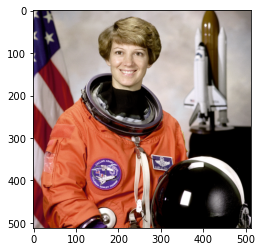

In [11]:
plt.imshow(img)

Clearly this is a color image. It has three channels R, G and B. Let us verify by checking the shape of the img array.

In [12]:
print(img.shape)

(512, 512, 3)


These numbers tell us that our array has 512 rows and 512 columns and 3 color channels. In the above output (few cells up) we also see an indication ```dtype```. This tells us what is the type of the pixels inside the array. The variable ```img``` is an array but its content can vary: we could have floating point values, integers etc. here ```uint8``` tells us we have unsigned (no negative values) integers in 8 bit, i.e. up to $2^{8}$ different possible pixel values.

## Part A (2 points)
Load an image "camera.png" from skimage.data_dir and store in variable camera. Then display the image and print it's shape. How many color channels does it have? 

In [13]:
# YOUR CODE HERE
filename = os.path.join(skimage.data_dir, 'camera.png')
camera = io.imread(filename)
#raise NotImplementedError()

In [14]:
#This is a gray-scale image. 
assert len(camera.shape) == 2

If this image is gray-scale, why does it look "colored"? Because, a default [colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html) has been applied on it (specifically [virdis](https://matplotlib.org/stable/users/prev_whats_new/dflt_style_changes.html#colormap)). We can change the deffault colormap through an optional parameter called `cmap` that allows us to set a certain colormap, here a gray one.

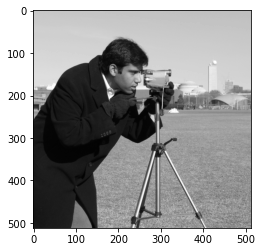

In [15]:
plt.imshow(camera, cmap='gray')

Instead of looking up paths of images on skimage.data_dir, the `skimgage data` library provides functions to load certain images. Example for loading the astronaut image using `data.astronaut()` (similarly `data.camera()` for the above camera image):

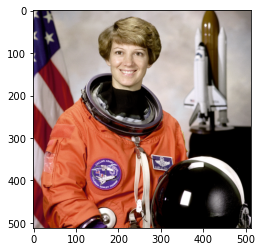

In [16]:
img = data.astronaut()
plt.imshow(img)

Since images are numpy arrays, we can index into these arrays to determine pixel value at a specific location or to acess parts of the image

In [17]:
#pixel value at top left pixel corresponding to row=0 and column=0
img[0,0]

array([154, 147, 151], dtype=uint8)

Let's say we want to focus our attention on a region in the middle of the image. We can for example take the rows 200-350 and columns 250-400. Instead of just using single coordinates we can now extract that part of the image using a **range** of pixels, the range being indicated via the ```:``` symbol. Here we write:

In [18]:
cropped = img[200:350, 250:400].copy()

**Note that we additionally use here the ```copy``` method. This ensures that whatever modification we make to the cropped version doesn't affect the original image!**.

We can again plot this cropped image:

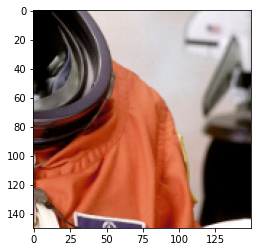

In [19]:
plt.imshow(cropped)

We can also check again the size of this cropped image. We expect 150 rows and 150 columns:

In [20]:
cropped.shape

(150, 150, 3)

We can simply display one color channel by selecting only one of the channels. Specifically, if we want the first channel we need:
- all rows of the first dimension: ```:```
- all columns of the second dimension: ```:```
- the first channel of the third dimension: ```0```

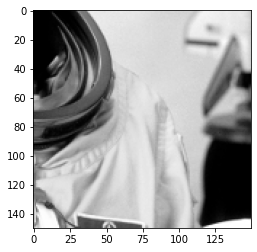

In [21]:
cropped_red = cropped[:,:,0]
plt.imshow(cropped_red, cmap = 'gray')

Again, since images are just numpy arrays, we can apply any of the methods that operate on the entire array such as mutiplying/dividing by a fixed number, taking square root pixel-wise, and so on. We can use methods to find the minimum pixel value, or the average pixel value, and so on. Or find how many pixel values are above a certain threshold (number).

In [22]:
#Divide each of the pixel values in the cropped region by 2
cropped_red/2

array([[  0. ,   0. ,   0. , ..., 111. , 105.5, 102. ],
       [  0. ,   0. ,   0. , ..., 109.5, 106. , 101. ],
       [  0. ,   0. ,   0. , ..., 109. , 106.5, 101. ],
       ...,
       [ 80. ,  64. ,  74. , ..., 127. , 127. , 127. ],
       [ 70. ,  69.5,  95.5, ..., 127. , 127. , 127. ],
       [ 72.5, 105.5, 109.5, ..., 127. , 127. , 127. ]])

In [23]:
#Average pixel value in the cropped region
np.mean(cropped_red)

152.06622222222222

In [24]:
#Store mean in a variable
avg = np.mean(cropped_red)
#Find which pixels are greater than the mean
cropThresholded = cropped_red > avg
cropThresholded

array([[False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [ True, False, False, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True]])

We see that the output is again a Numpy array and that it is filled with ```True``` and ```False``` values: we have a **boolean array**. Again the comparison here was done **element wise**: each pixel was compared to the average value and the result stored in a new array. As we are working with an image, what we have just done here is essentially **thresholding**: we created a binary image where pixels say ```True``` above the intensity threshold and ```False``` otherwise. We can actually plot the result:

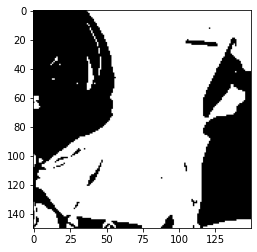

In [25]:
plt.imshow(cropThresholded, cmap='gray')

## Part B (4 points)
Load back the image "camera.png" and store it in variable `camera`.
Assign the middle `k` rows and middle `k` columns with `255` (`k` is a parameter and can be assumed to be even).
Return the modified image. 

* **For example**, if the image size is `100x100`, and `k=20`, then the middle rows/columns are given by the slices `40:60`

In [56]:
def modifyCameraImage(k):
    """Loads the camera image. Modifies middle k rows and middle k columns with 255 and returns the modified image.
    """
    # YOUR CODE HERE
    camera = data.camera()    
    xLen = camera.shape[0]//2
    yLen = camera.shape[1]//2
    
    for i in range(xLen - k//2, xLen + k//2 + 1, 1):
        camera[i, yLen] = 255
        camera[xLen, i] = 255
        
    return camera
    #raise NotImplementedError()
modifiedCamera = modifyCameraImage(100)
print(np.median(modifiedCamera))

152.0


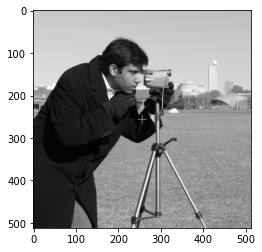

In [27]:
#double-check that by passing 20 to the function, there is a bright "+" looking sign in the middle of the image
modifiedCamera = modifyCameraImage(20)
plt.imshow(modifiedCamera, cmap = 'gray')

In [54]:
#test the functions with different parameter values
modifiedCamera = modifyCameraImage(0)
assert np.median(modifiedCamera) == 152
modifiedCamera = modifyCameraImage(100)
assert np.median(modifiedCamera) == 204

AssertionError: 

## Part C (2 points)
 - Subtract the original camera image from the modified camera image
 - In the resulting image, find number of pixels that are oustide the center "+" 


In [57]:
def subtractCameraImage(k):
    """Returns an image obtained by subtracting the original camera image from the modified camera image
    """
    #Note: do not use loops. Use functions already defined to modify the camera image. 
    #The code below need not be more than 3 lines of code.
    originalCamera = modifyCameraImage(0)
    modifiedCamera = modifyCameraImage(k) - originalCamera
    return modifiedCamera
    
    # YOUR CODE HERE
    #raise NotImplementedError()


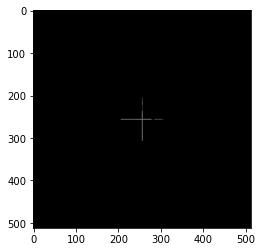

In [58]:
#call subtractCameraImage and examine the output. 
#Does it align with your expectation? If you are not sure, ask the instructor!

subImg = subtractCameraImage(100)
plt.imshow(subImg, cmap = 'gray')

In [59]:
def findPixelsOutsidePlus(k):
    '''
    Calls the subtractCameraImage fuction and, in the resulting image, 
    finds and returns the number of pixels that are NOT in the center + 
    '''
    
    subImg = subtractCameraImage(k)
    
    #Set figure size of the upcoming plots 
    plt.figure(figsize=(9, 9)) 
    # Set up a subplot grid that has height 2 and width 1,
    # and set the first such subplot as active.
    plt.subplot(2, 1, 1)
    # Make the first plot
    plt.imshow(data.camera(), cmap = 'gray')

    # Set the second subplot as active, and make the second plot.
    plt.subplot(2, 1, 2)
    plt.imshow(subImg, cmap = 'gray')

    #Compute number of pixels that are NOT in the center "+"
    (nrows, ncols) = subImg.shape
    numPlusPixels = k*ncols + k*nrows - k*k
    numZeroPixels = nrows*ncols - numPlusPixels
    return numZeroPixels

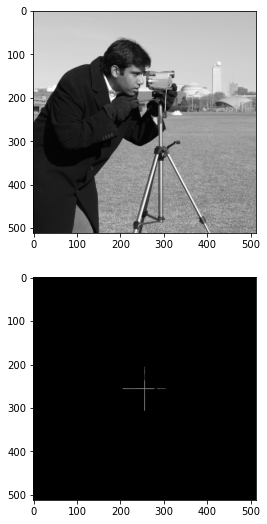

In [60]:
numZeroPixels = findPixelsOutsidePlus(100)
assert(numZeroPixels == 169744)

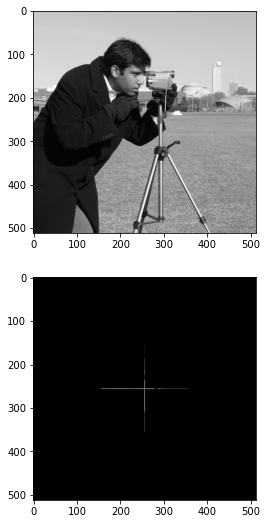

In [61]:
numZeroPixels = findPixelsOutsidePlus(200)
assert(numZeroPixels == 97344)

## Part D (2 points)
 - Call subtractCameraImage with parameter `k` and store result in variable `crossneg`. 
 - Create a boolean array where only places in ```crossneg``` which are larger than a threshold `200` are ```True```. 
 - Plot the boolean array (thresholded image)
 - Return an array containing all the pixels in ```crossneg``` which are `True` in the boolean array (recall `Boolean array Indexing` from the intro notebook?).
 

*Note: Avoid loops. A single line of code per bullet point above is needed.*

(512, 512)
512


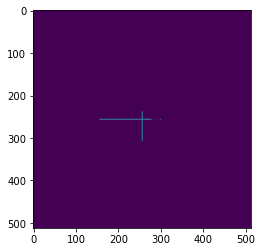

In [68]:
def findPixelsAbove(k):
    """Returns an array containing pixel values in crossneg that are greater than a threshold (200)
    """
    crossneg = subtractCameraImage(k)
    greaterThan200 = crossneg > 200
    plt.imshow(greaterThan200)
    return greaterThan200 > 200
    
    # YOUR CODE HERE
    #raise NotImplementedError()
val = findPixelsAbove(200)
print(val.shape)
print(val.shape[0])

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
(512, 512)


AssertionError: 

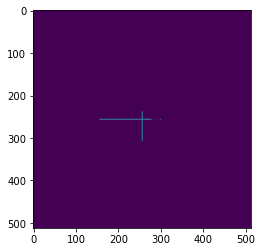

In [63]:
val = findPixelsAbove(200)
print(val.shape)
assert(val.shape[0] == 51528)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


AssertionError: 

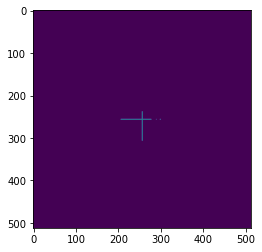

In [53]:
val = findPixelsAbove(100)
assert(val.shape[0] == 32359)